# 🤖 **CNNs**

As *Redes Neurais Convolucionais* remontam ao estudo do córtex visual do cérebro e têm sido usada no reconhecimento de imagens desde a década de 1980, mas também são utilizadas para reconhecimento de voz e processamento de linguagem natural (NLP).

## **Camadas Convolucionais**

As camadas convolucionais são responsáveis por extrair características de uma imagem ao aplicar pequenos filtros (ou kernels) sobre a entrada. Esses filtros percorrem a imagem e destacam padrões como bordas, texturas e formas específicas. Diferente das camadas densas, onde cada neurônio está conectado a todos os pixels da entrada, as convoluções analisam apenas pequenas regiões de cada vez, tornando o modelo mais eficiente e reduzindo a complexidade computacional.

## **Stride (Passo)**

O stride define o número de pixels que o filtro avança a cada movimento pela imagem. Quando o stride é pequeno, a varredura é mais detalhada, preservando mais informações, mas aumentando o custo computacional. Já um stride maior reduz o tamanho da saída e melhora a eficiência do modelo, embora possa perder detalhes importantes. O ajuste do stride é um fator essencial para equilibrar precisão e velocidade no treinamento da rede.

## **Padding**

O padding adiciona pixels extras ao redor da imagem antes da convolução, garantindo que as bordas também sejam processadas corretamente. Sem padding, a imagem diminui a cada convolução, o que pode levar à perda de informações importantes. Com padding adequado, a saída mantém um tamanho semelhante ao da entrada, preservando a resolução e garantindo que os filtros possam analisar todas as partes da imagem de maneira uniforme.

## **Filtros (Kernels)**

Os filtros são pequenas matrizes de valores que deslizam sobre a imagem, realizando operações matemáticas para detectar padrões. No início da rede, os filtros aprendem a identificar detalhes básicos, como linhas e curvas, enquanto nas camadas mais profundas, eles conseguem reconhecer objetos mais complexos. Cada filtro gera um novo mapa de características, que representa uma versão transformada da imagem original, ajudando o modelo a entender diferentes aspectos da cena.

## **Mapas de Características (Feature Maps)**

Cada filtro aplicado gera um novo mapa de características, que é uma versão transformada da imagem original contendo apenas os padrões que aquele filtro conseguiu captar. Esses mapas representam diferentes aspectos da imagem, como texturas e bordas, e são empilhados ao longo das camadas para formar uma representação abstrata do conteúdo. Quanto mais camadas convolucionais a rede possui, mais refinadas e detalhadas essas representações se tornam.

## **ReLU (Rectified Linear Unit)**

Após cada convolução, a função de ativação ReLU é aplicada para introduzir não-linearidade ao modelo, permitindo que ele aprenda padrões mais complexos. A ReLU simplesmente substitui todos os valores negativos por zero, mantendo os positivos inalterados. Isso acelera o treinamento e evita que a rede fique presa a relações lineares, melhorando sua capacidade de generalização.

## **Camadas Totalmente Conectadas (Fully Connected - FC)**

Depois das camadas convolucionais e de pooling, os mapas de características são achatados e passados para camadas totalmente conectadas. Nessa etapa, o modelo combina as informações extraídas e aprende a associá-las a categorias específicas. Cada neurônio dessas camadas recebe entradas de todos os pixels processados anteriormente, permitindo que a rede faça previsões baseadas nos padrões aprendidos ao longo das convoluções.

## **Saída e Classificação**

Por fim, a rede usa uma função como softmax ou sigmoid para transformar os valores calculados em probabilidades associadas a cada classe. No caso de classificação de imagens, por exemplo, a saída pode indicar a probabilidade de a imagem pertencer a cada uma das classes disponíveis, como "gato", "cachorro" ou "carro". O modelo é treinado ajustando seus filtros e pesos para maximizar a precisão dessa previsão, refinando suas detecções a cada nova iteração.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_image
from tensorflow import keras

%matplotlib inline

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
  File "C:\Users\anton\AppData\Local\Temp\ipykernel_10112\2808304972.py", line 1, in <module>
    import matplotlib.pyplot as plt
ModuleNotFoundError: No module named 'matplotlib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\IPython\core\interactiveshell.py", line 2170, in showtraceback
  File "c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\e

carregando e reescalonandos as imagens para que cada pixel fique entre 0 a 255

In [3]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

### Aplicando filtros

Criando 2 filtros de 7 x 7 (um com uma linha branca vertical no meio e outro com uma linha branca na horizontal no meio)

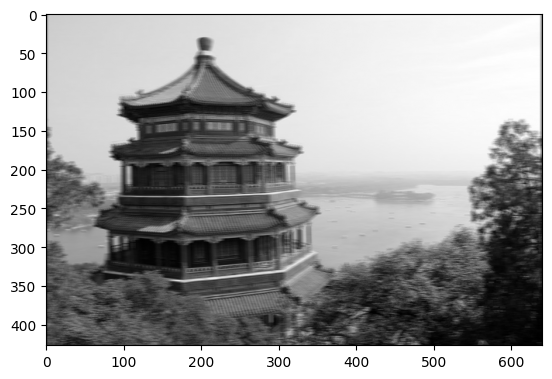

In [4]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

In [5]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu")

> outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

**images** é o mini-batch de entrada  (um tensor 4D)

**filters** é o conjunto de filtros a se aplcar (também um tensor 4D)

**strides** é igual a **1**, mas também pode ser um array 1D com quatro elementos.

**padding** deve ser igual a *same* (utiliza zero-padding, caso necessário.) ou *valid* (não usa o zero-padding)


## **Pooling (Subamostragem)**

O pooling reduz a dimensionalidade dos mapas de características, tornando o modelo mais eficiente e menos sensível a pequenas variações na imagem. O max pooling, por exemplo, seleciona o maior valor dentro de uma determinada região, destacando os padrões mais fortes. Já o average pooling calcula a média dos valores em uma região, gerando uma suavização da imagem. Essas técnicas ajudam a tornar a rede mais robusta a mudanças de escala e deslocamentos na imagem.

In [6]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [7]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")

In [8]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

## Implementação de uma **CNN** simples para lidar com o problema do **Fasion MNIST**

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

## Implementando uma **ResNet-34** do **ZERO** usando keras:

In [10]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding='SAME', use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding='SAME', use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding='SAME', use_bias=False),
                keras.layers.BatchNormalization()
            ]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.main_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)


In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3], padding="SAME", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\layers\layer.py:393: UserWarning: `build()` was called on layer 'residual_unit_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\layers\layer.py:393: UserWarning: `build()` was called on layer 'residual_unit_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit (ResidualUnit)    │ (None, 56, 56, 64)     │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_1 (ResidualUnit)  │ (None, 56, 56, 64)     │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_2 (ResidualUnit)  │ (None, 56, 56, 64)     │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_3 (ResidualUnit)  │ (None, 28, 28, 128)    │       222,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_4 (ResidualUnit)  │ (None, 28, 28, 128)    │       295,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_5 (ResidualUnit)  │ (None, 28, 28, 128)    │       295,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_6 (ResidualUnit)  │ (None, 28, 28, 128)    │       295,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_7 (ResidualUnit)  │ (None, 14, 14, 256)    │       886,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_8 (ResidualUnit)  │ (None, 14, 14, 256)    │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_9 (ResidualUnit)  │ (None, 14, 14, 256)    │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_10 (ResidualUnit) │ (None, 14, 14, 256)    │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_11 (ResidualUnit) │ (None, 14, 14, 256)    │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_12 (ResidualUnit) │ (None, 14, 14, 256)    │     1,181,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_13 (ResidualUnit) │ (None, 7, 7, 512)      │     3,543,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_14 (ResidualUnit) │ (None, 7, 7, 512)      │     4,722,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit_15 (ResidualUnit) │ (None, 7, 7, 512)      │     4,722,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,131,210 (80.61 MB)

 Trainable params: 21,115,978 (80.55 MB)

 Non-trainable params: 15,232 (59.50 KB)

# Usando Modelo **Pré-Treinados**

O código acima foi só pra exemplificar a criação de um modelo renomado na mão, mas a utilização desse tipo de modelo, que já passou por um treinamento extensivo em cima de algum problema, hoje é feita através de poucas linhas no python, um exemplo é na utilização da **ResNet**:

In [13]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

esse código baixa a arquitetura e todos os pesos finais utilizados no treinamento.


A **ResNet** espera que as imagens de *224 x 224* pixels, então precisamos dar um **resize** antes de utilizar:

In [14]:
images_resized = tf.image.resize(images, [224, 224])

Cada modelo exige que a imagem seja pré-processada, cada um com sua especificidade, mas geralmente tem uma função *preprocess_input* para fazer isso:

In [15]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

agora podemos utilizar o modelo pré-treinado para fazer predições, simples assim:

In [16]:
Y_proba = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Plotando principais previsões K, incluindo o nome da classe e a probabilidade estimada de cada uma predita

In [17]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12} {:.2f}%".format(class_id, name, y_proba * 100))
    print()
        

Image #0
 n02825657 - bell_cote    82.35%
 n03877845 - palace       6.75%
 n03781244 - monastery    4.19%

Image #1
 n03530642 - honeycomb    49.81%
 n13040303 - stinkhorn    33.96%
 n02206856 - bee          4.35%



Vários outros modelos pré-treinados podem ser acessados com ***keras.applications.(...)***

# 🤖 Usando modelos Pré-treinados para **TRANSFER LEARNING**

Digamos que queremos treinar um modelo para prever tipos de flores, mas não temos dados suficientes para isso, existe uma rede pré-treinada com os melhores pesos que podemos utilizar nas camadas inferiores, isso chama-se *transfer-learning*.

In [19]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [20]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

esse conjunto de dados vem somente com **train** data, então precisamos dividir o dataset de treino em treino, teste e validação, fazemos isso com uma função própria do *tfds*

In [21]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

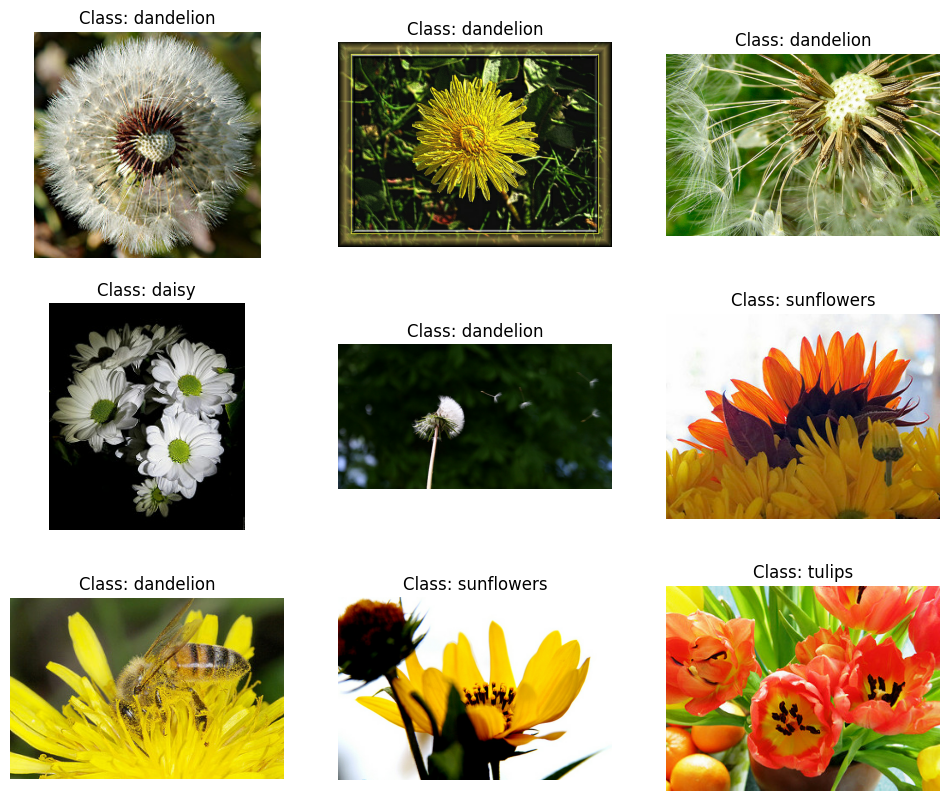

In [22]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

A **CNN** espera imagens *224 X 224*, para isso, criaremos uma função para redimensionar

In [23]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [24]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set_raw.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

## Criando Data Augmentation

In [25]:
### Tirado do GitHub Oficial

def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False): # Função que foi criada na célula anterior, mas agora com o aprimoramento do data augmentation
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set_raw.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

Criando um modelo a partir do ***Xception***, pré-treinado do *ImageNet*. Excluímos as redes principais e a camada média de pooling global, juntamente com a camada de saída densa. Após isso, criamos nossa própria camada de pooling global, com base na saída do nosso modelo básico, seguida por uma camada densa de saída com uma unidade por classe, usando a função de ativação softmax. Por último, criamos o modelo com *Keras*

In [26]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False) # include_top Exlui a camada média de pooling global e a camada de saída densa.
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [27]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        512 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add[0][0]       

 Total params: 20,871,725 (79.62 MB)

 Trainable params: 20,817,197 (79.41 MB)

 Non-trainable params: 54,528 (213.00 KB)

### Congelando os pesos das camadas pré-treinadas no início do treinamento:

In [28]:
for layer in base_model.layers:
    layer.treinable = False

### Compilando e treinando o nosso modelo:

isso demorará muito, tente utilizar **GPU** para acelerar o processo.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

descongelando camadas

In [29]:
for layer in base_model.layers:
    layer.treinable = True

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Podemos também criar um modelo para prever as coordenadas do objeto, criando referencias para pontos em uma imagem que representam os quatro cantos de um retângulo a partir do centro, para isso, criamos uma camada densa como output com 4 saídas.

In [31]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation='softmax')(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs=base_model.input, outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"], optimizer=optimizer,metrics=["accuracy"])

c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [32]:
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer_4[0]… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        512 │ conv2d_45[0][0]   │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add_24[0][0]    

 Total params: 20,879,921 (79.65 MB)

 Trainable params: 20,825,393 (79.44 MB)

 Non-trainable params: 54,528 (213.00 KB)